In [1]:
!nvidia-smi

Tue Oct 22 11:23:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        On  |   00000000:21:00.0 Off |                  Off |
| 30%   37C    P8             21W /  150W |       1MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/athaya


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [4]:
from IPython.display import display, Image

In [5]:
pip show ultralytics

Name: ultralytics
Version: 8.3.19
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Install gdown untuk mendownload file dari Google Drive
!pip install gdown

import gdown
import zipfile
import os

# URL Direct Download Link Google Drive
#dari file/d/ ganti jadi uc?id= lalu /view?usp=sharing hapus
url = "https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA"  # Ganti dengan direct download link Anda
#https://drive.google.com/file/d/1ChDMxp-KPbt3Hrei4F97vlBToNmQqeK8/view?usp=sharing

# Path untuk menyimpan file di Kaggle Notebook
output = "dataset.zip"

# Download file dari Google Drive
gdown.download(url, output, quiet=False)

# Unzip file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(".")

# Optionally, hapus file zip setelah diekstrak
os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA
From (redirected): https://drive.google.com/uc?id=1nAS50kajJvx0CRA_7YIijsgOiq3ztAyA&confirm=t&uuid=6a495303-c5e9-4174-ba43-4ef49739261e
To: /athaya/dataset.zip
100%|██████████| 3.21G/3.21G [00:58<00:00, 54.6MB/s]


In [8]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 32.3 MB/s eta 0:00:0000:0100:01m


In [19]:
%cd {HOME}
!yolo task=detect mode=train data=data.yaml model=yolov8m.pt epochs=35 imgsz=640 batch=64

/athaya
Ultralytics 8.3.19 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 23995MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=35, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

In [20]:
!ls {HOME}/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch2.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch13625.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch13626.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch13627.jpg	 weights


/athaya


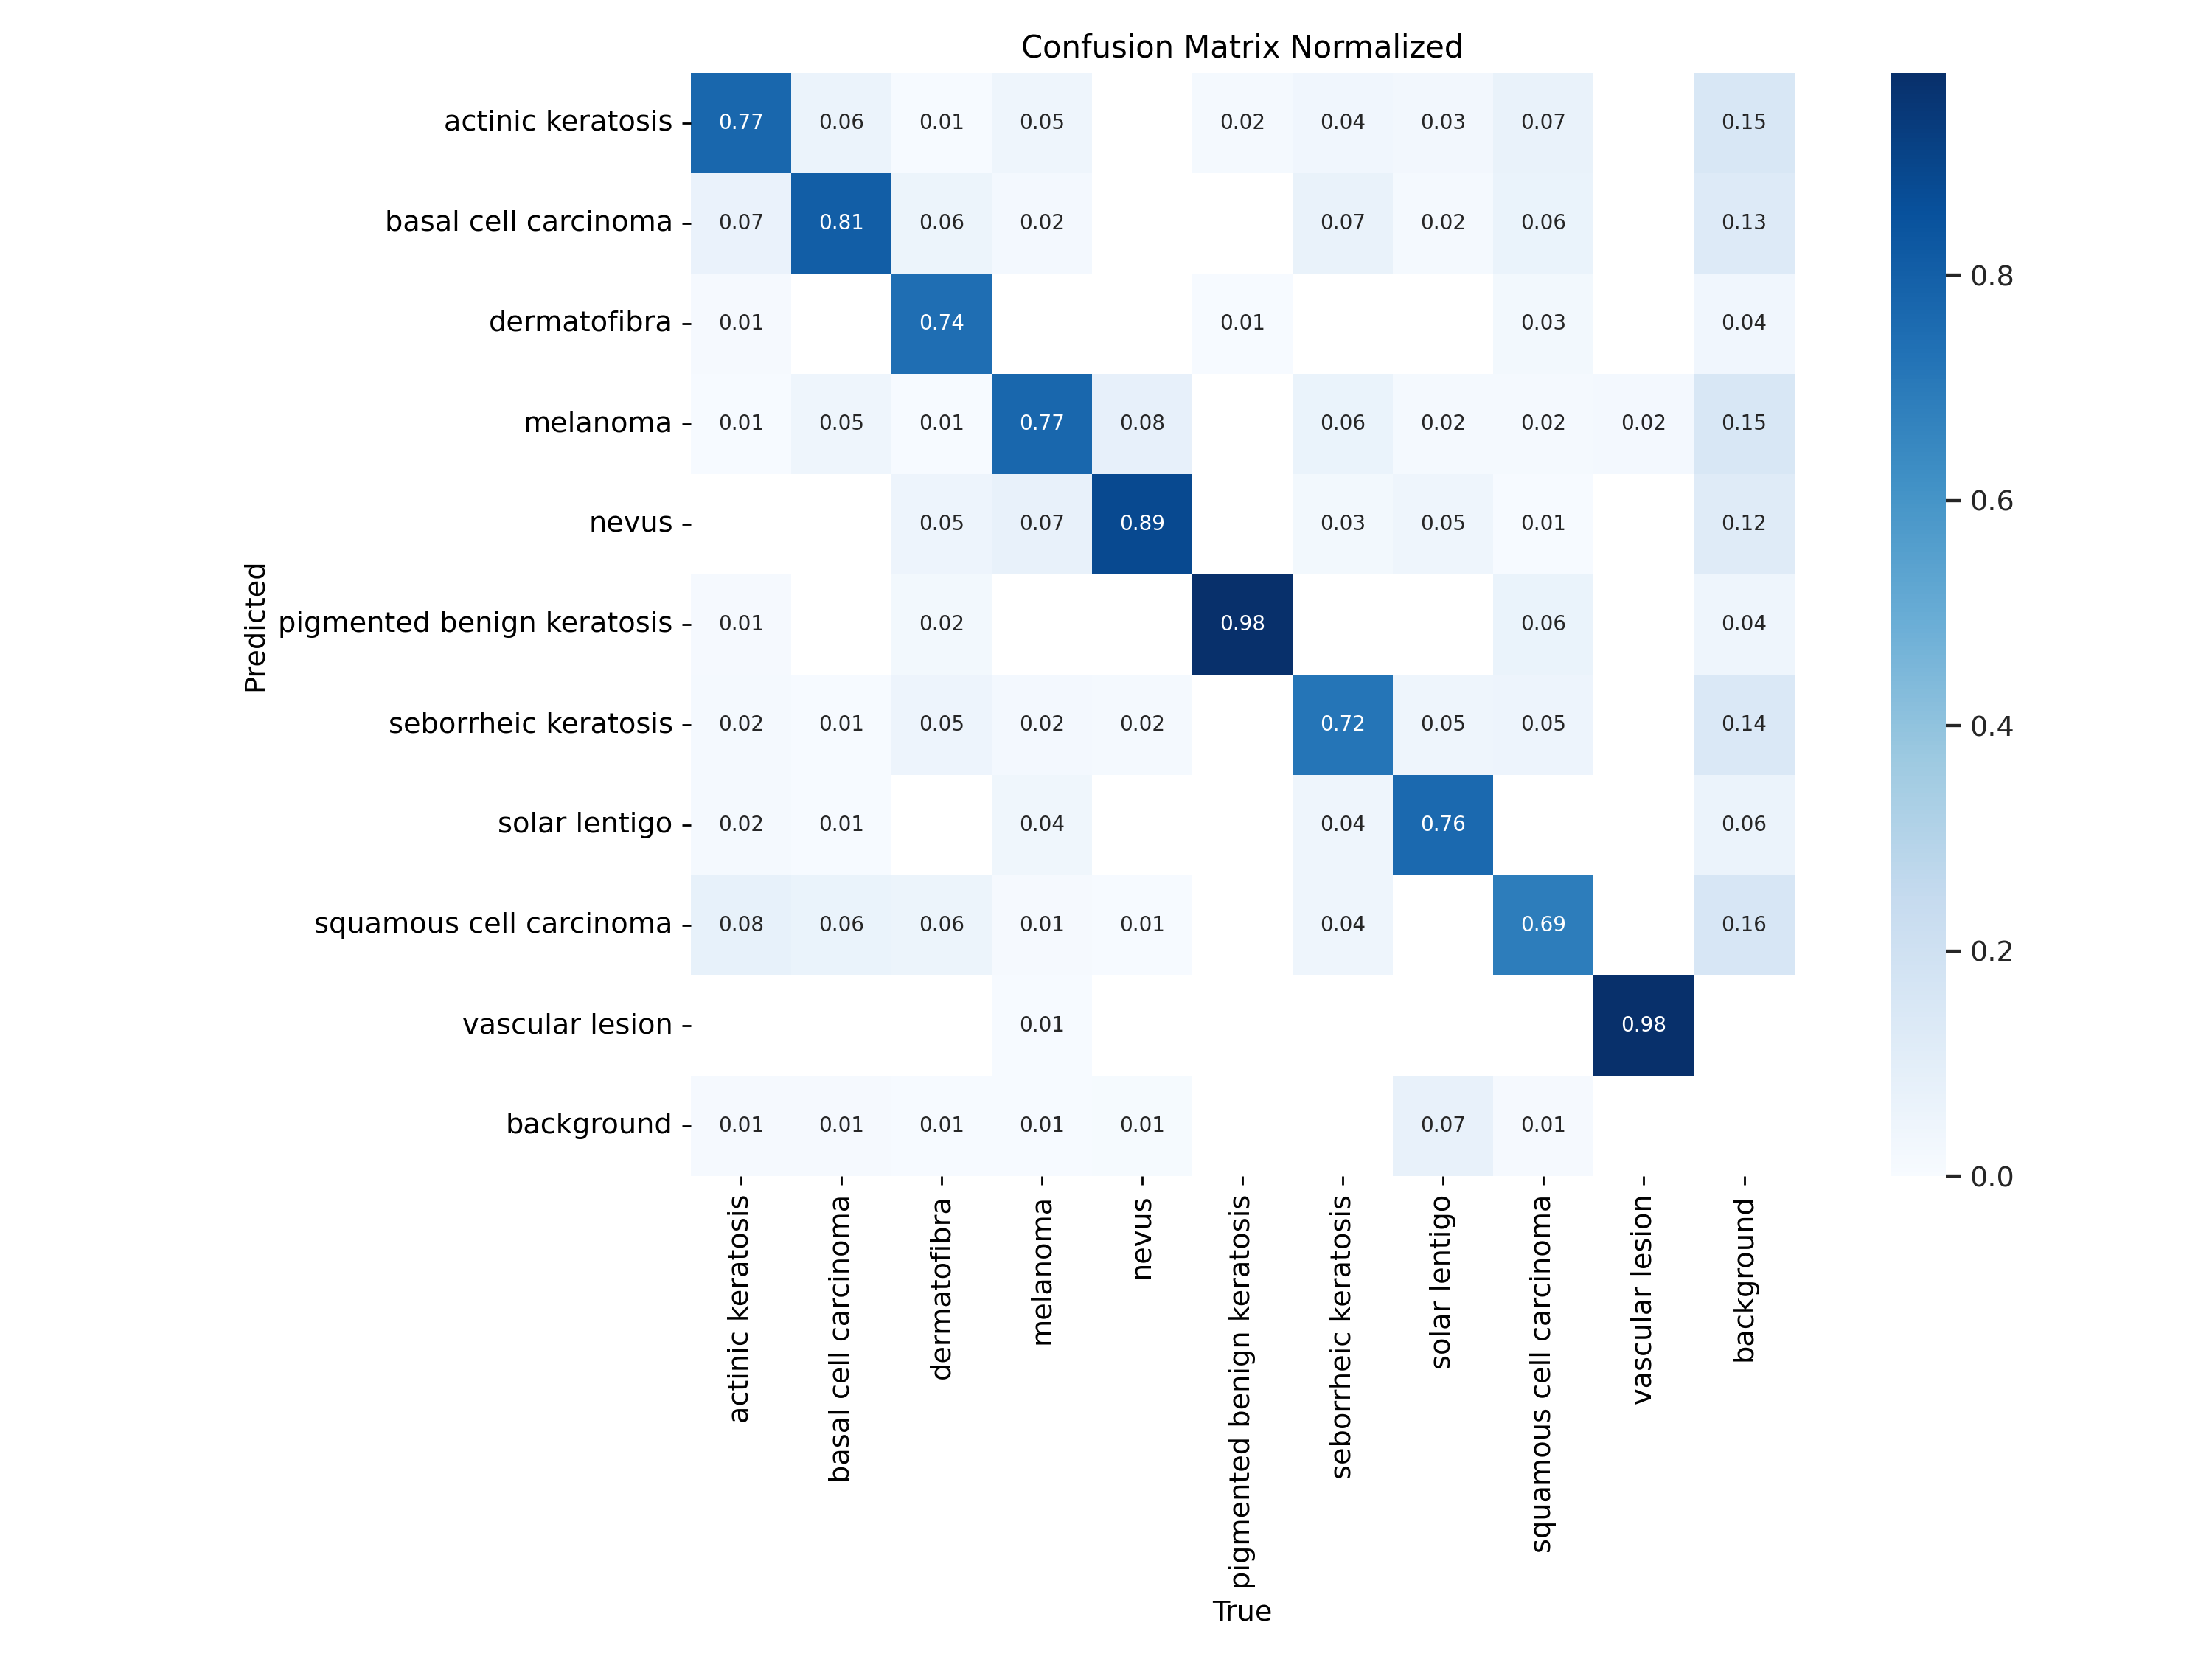

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/athaya


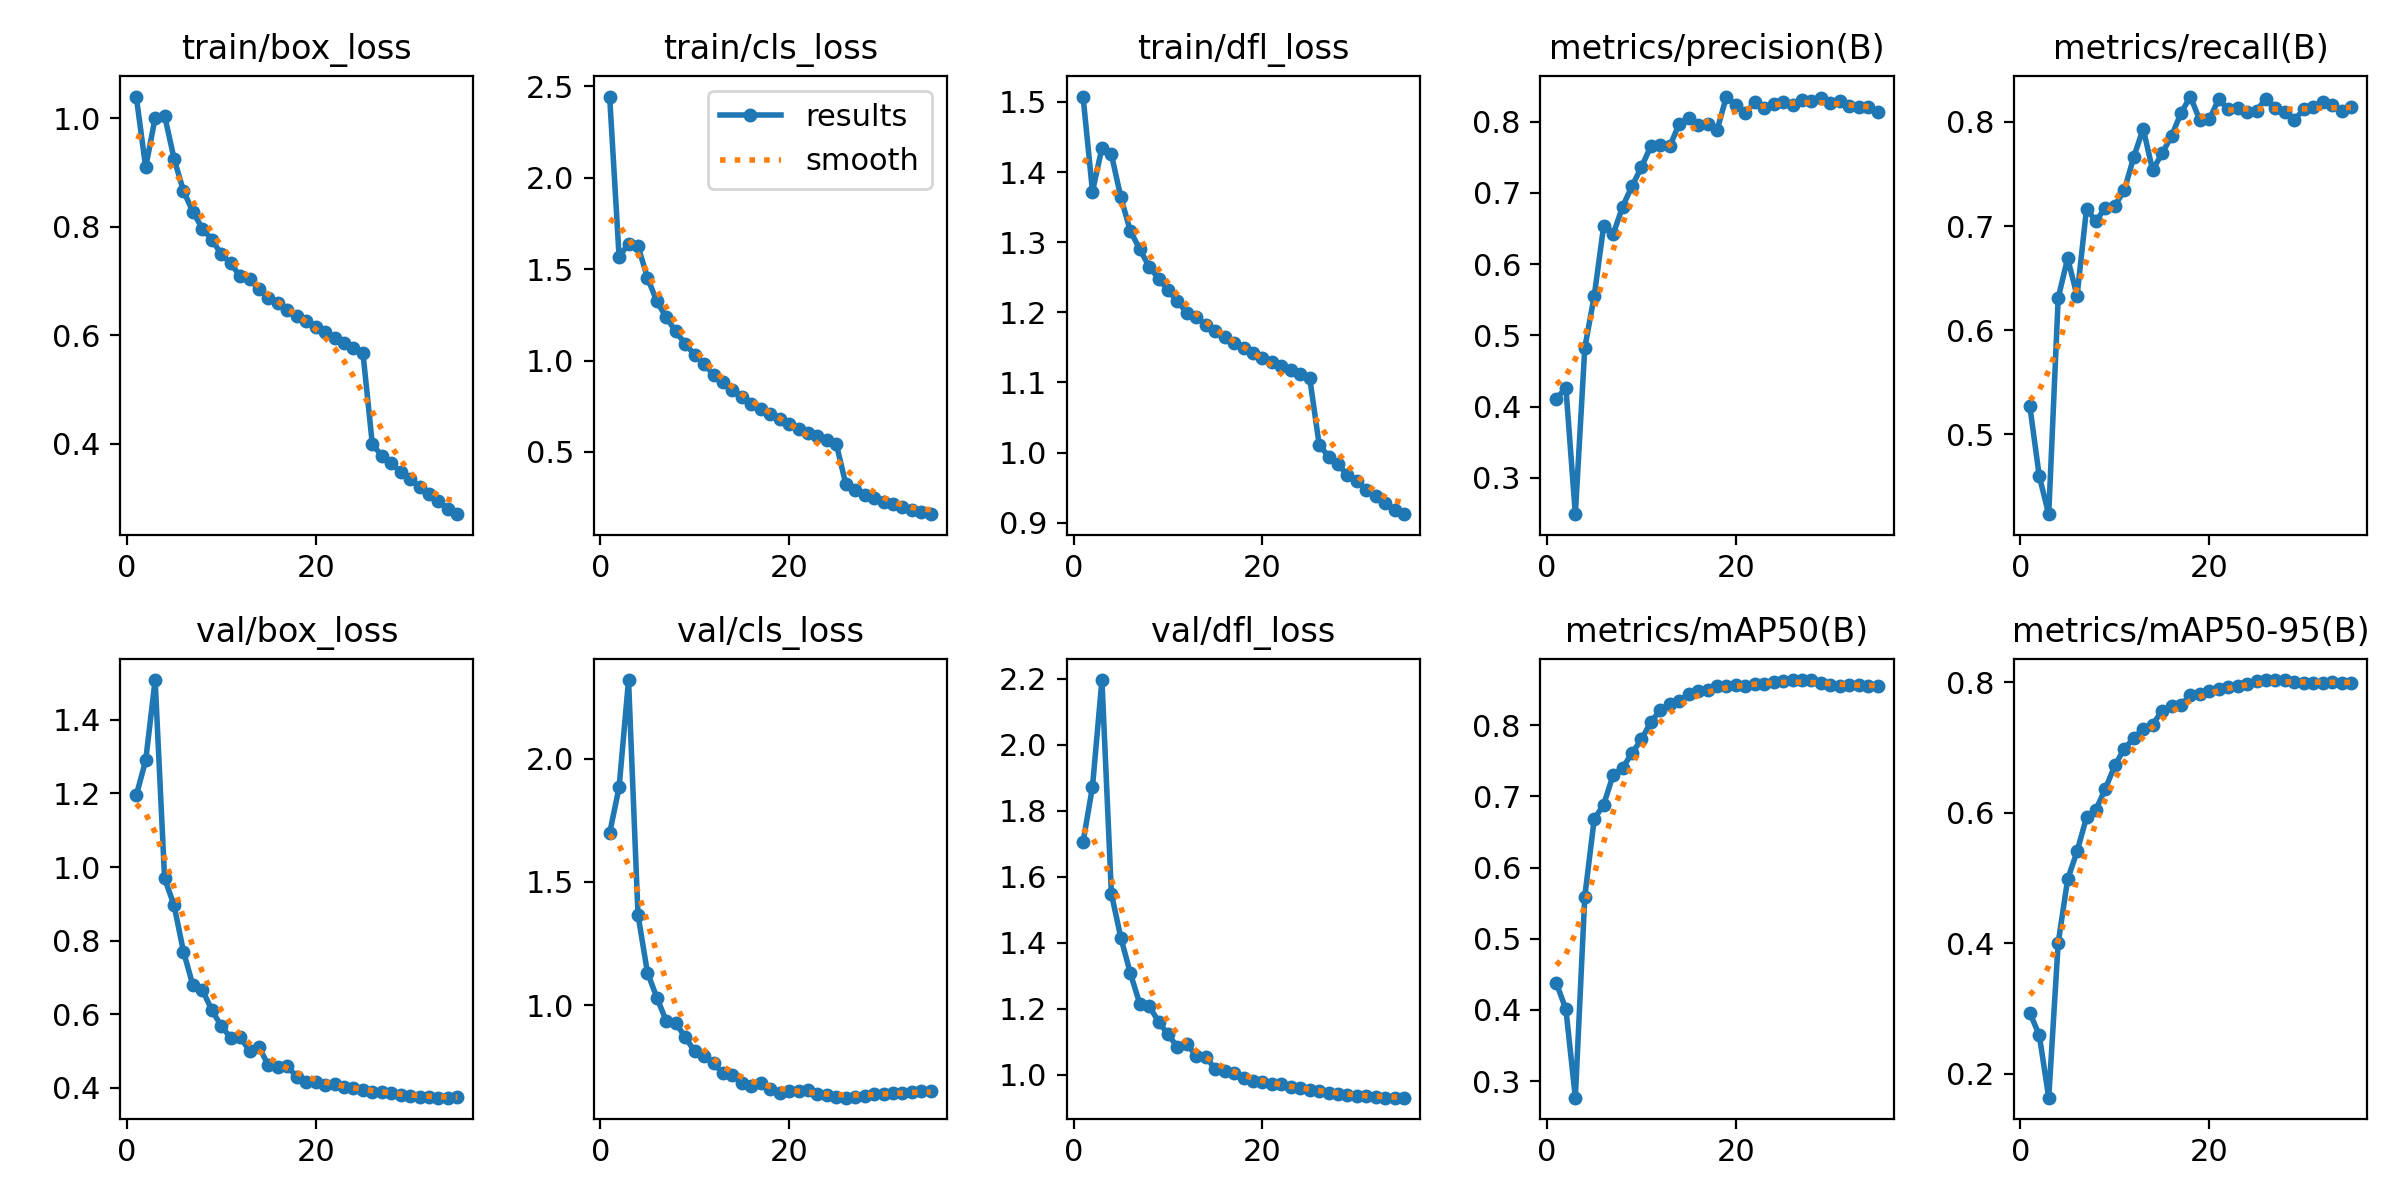

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validating

In [29]:
%cd {HOME}

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

/athaya
Ultralytics 8.3.19 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 23995MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /athaya/datasets/valid/labels.cache... 1684 images, 0 backgrounds,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1684       1684      0.829       0.81      0.863      0.804
     actinic keratosis        162        162      0.774      0.763      0.802      0.716
  basal cell carcinoma        171        171      0.778      0.797      0.856      0.752
          dermatofibra        160        160      0.969      0.769      0.905      0.806
              melanoma        149        149      0.704      0.785      0.812      0.779
                 nevus        185        185      0.821      0.886      0.905      0.867
pigmented benign keratosis        177        177      0.919       0.96      0.976      0.941
  seborrheic keratosis       

Ground Truth


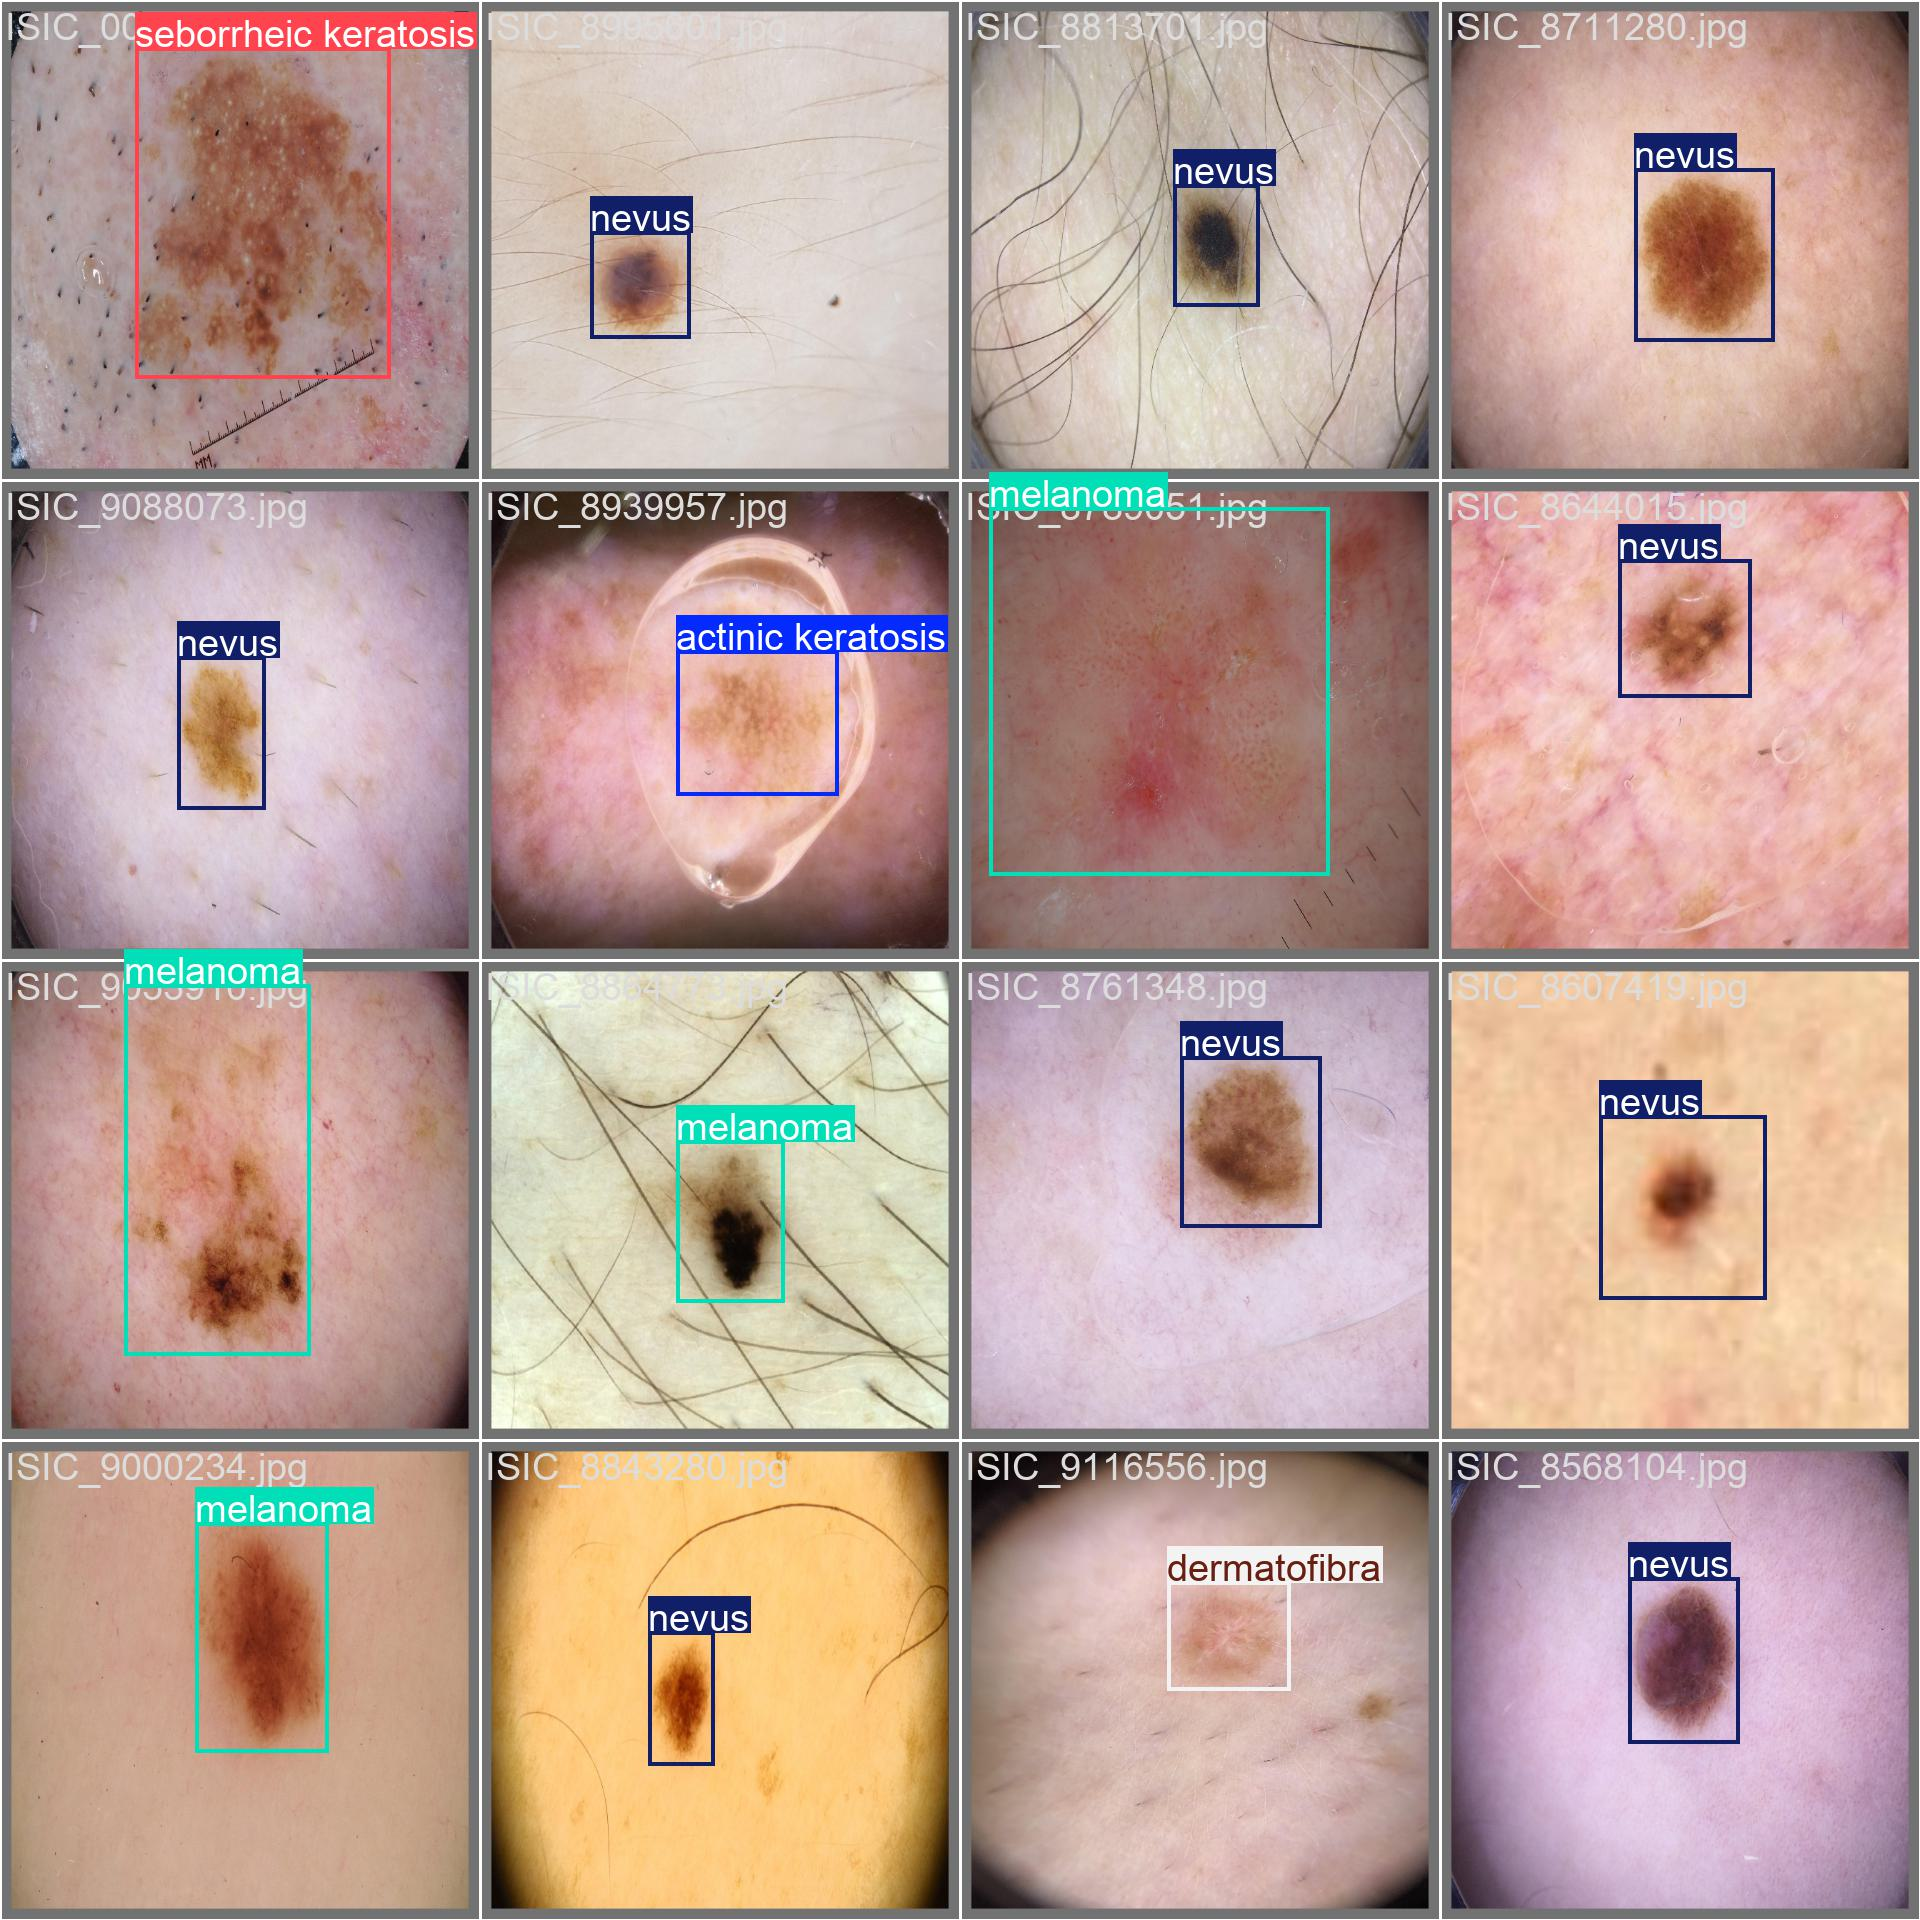


Prediction



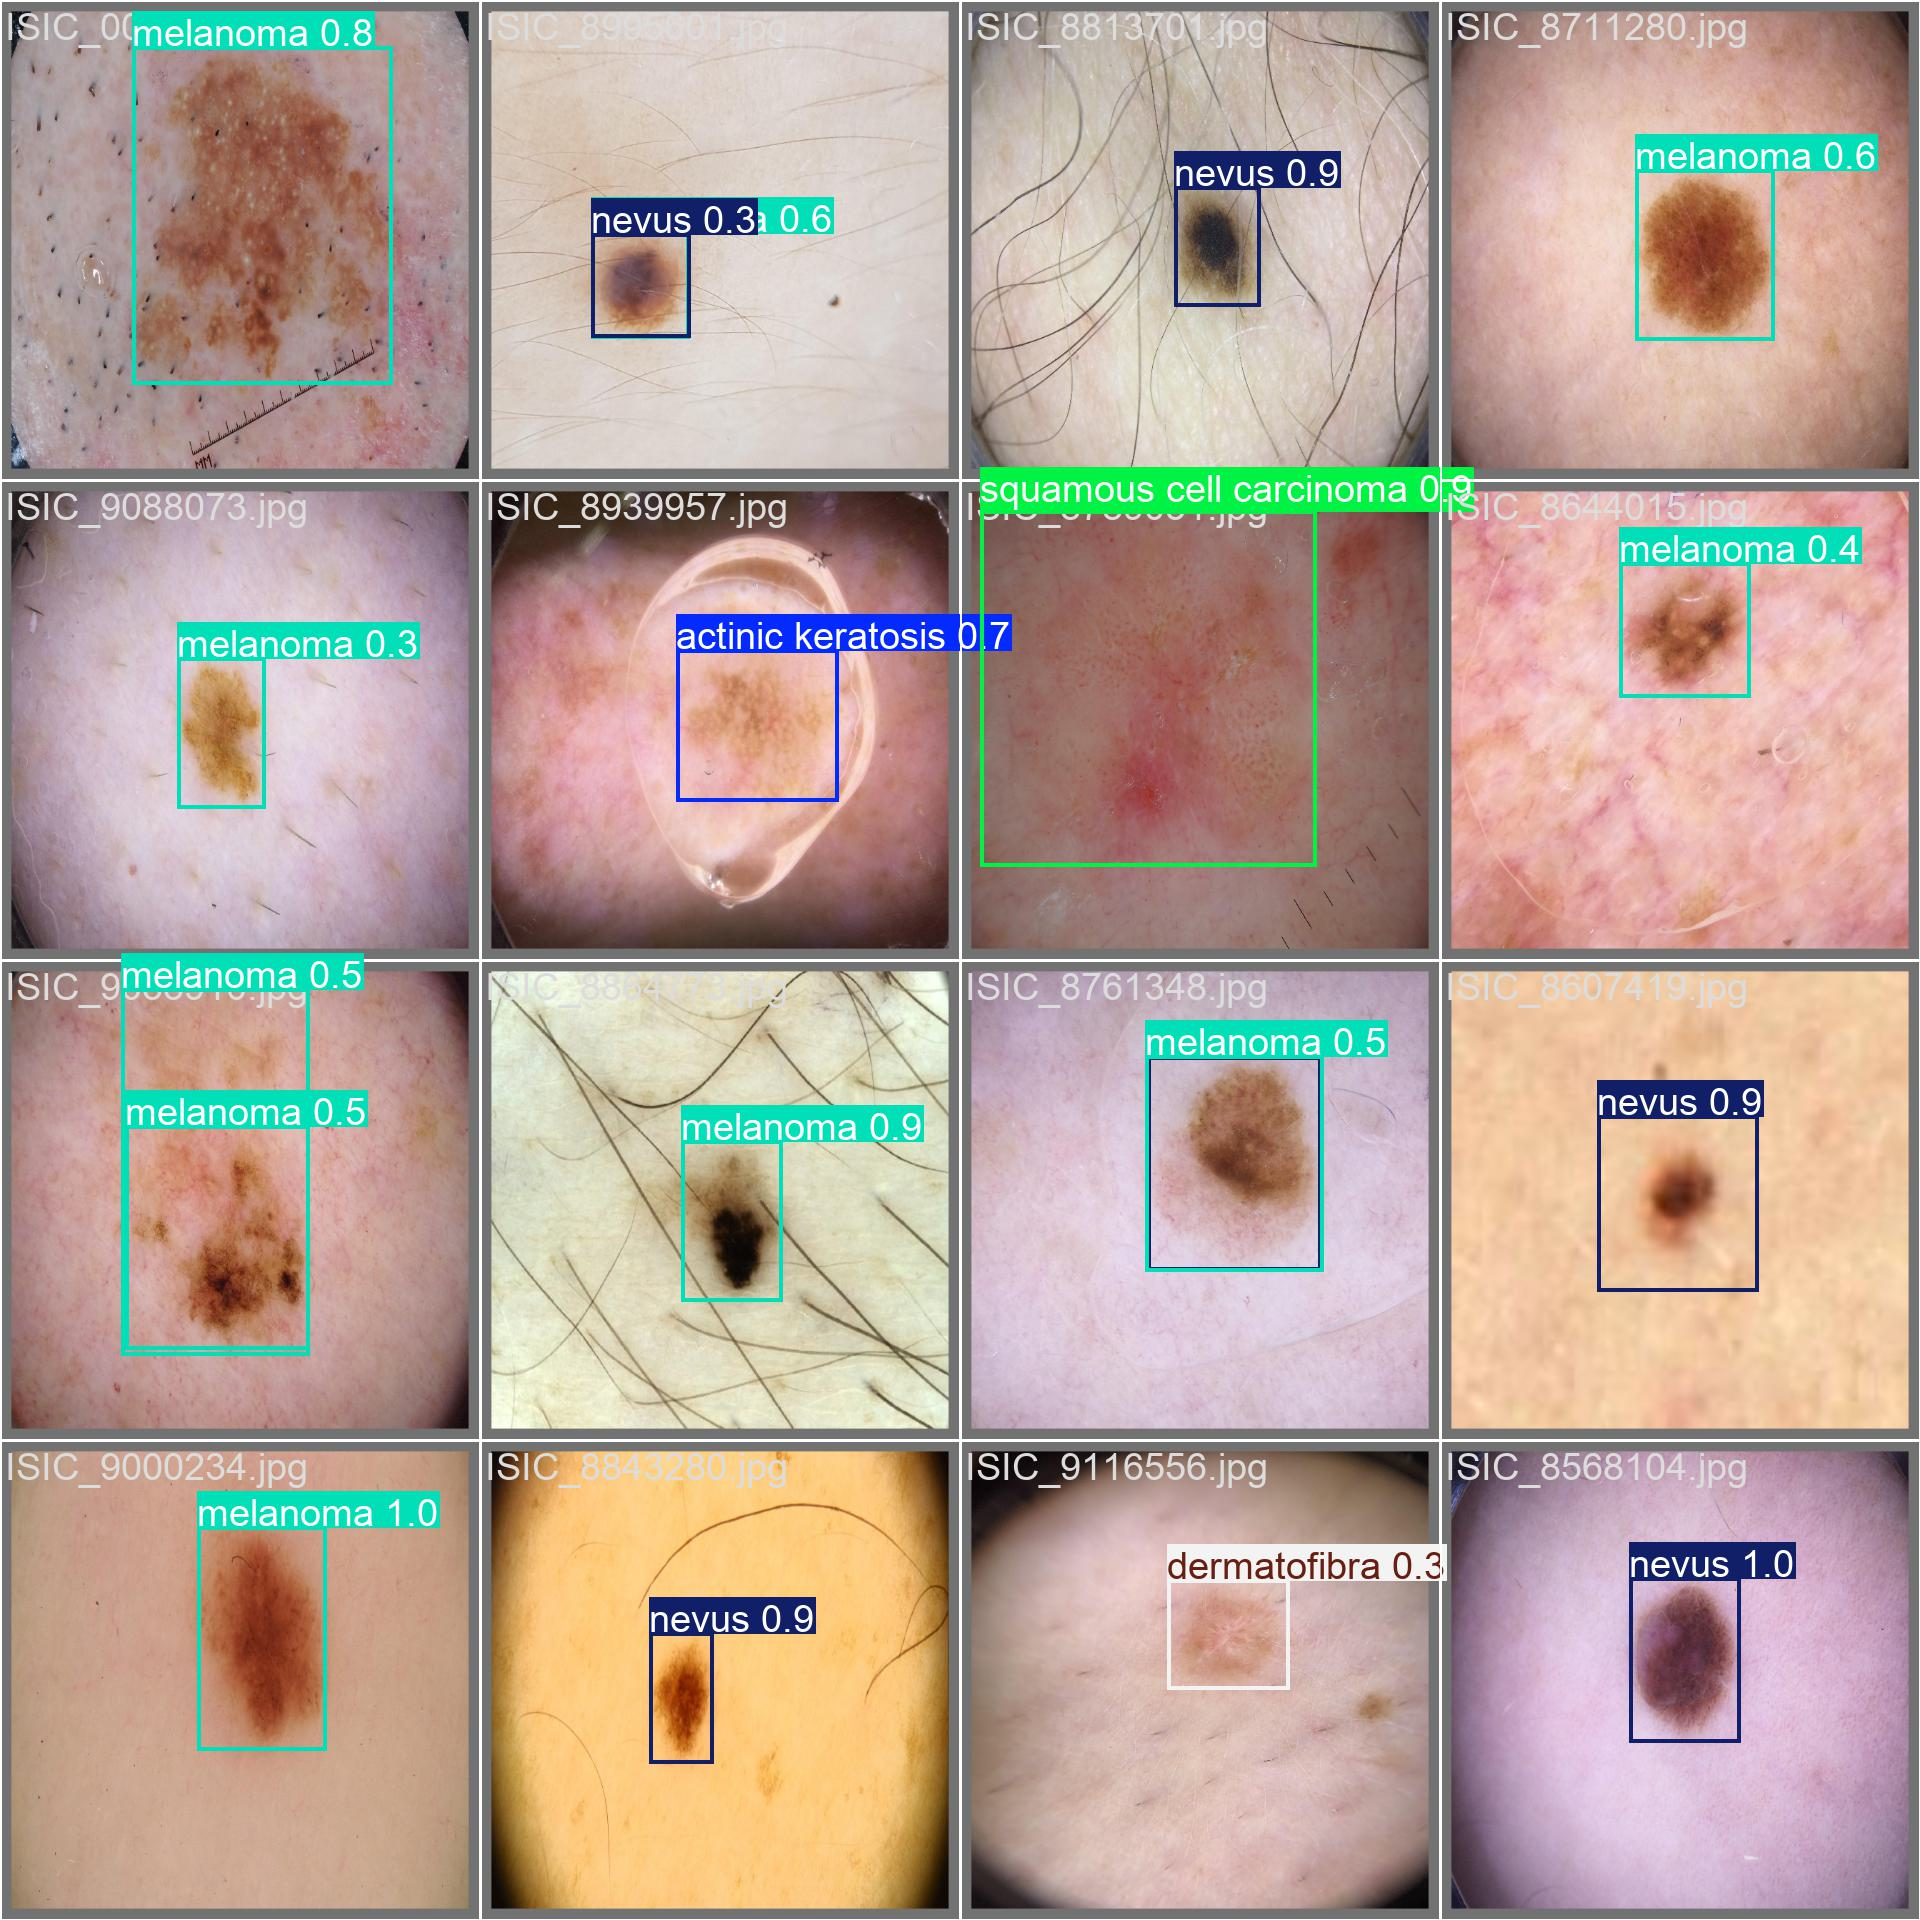

In [41]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val2/val_batch0_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val2/val_batch0_pred.jpg', width=500))

Ground Truth


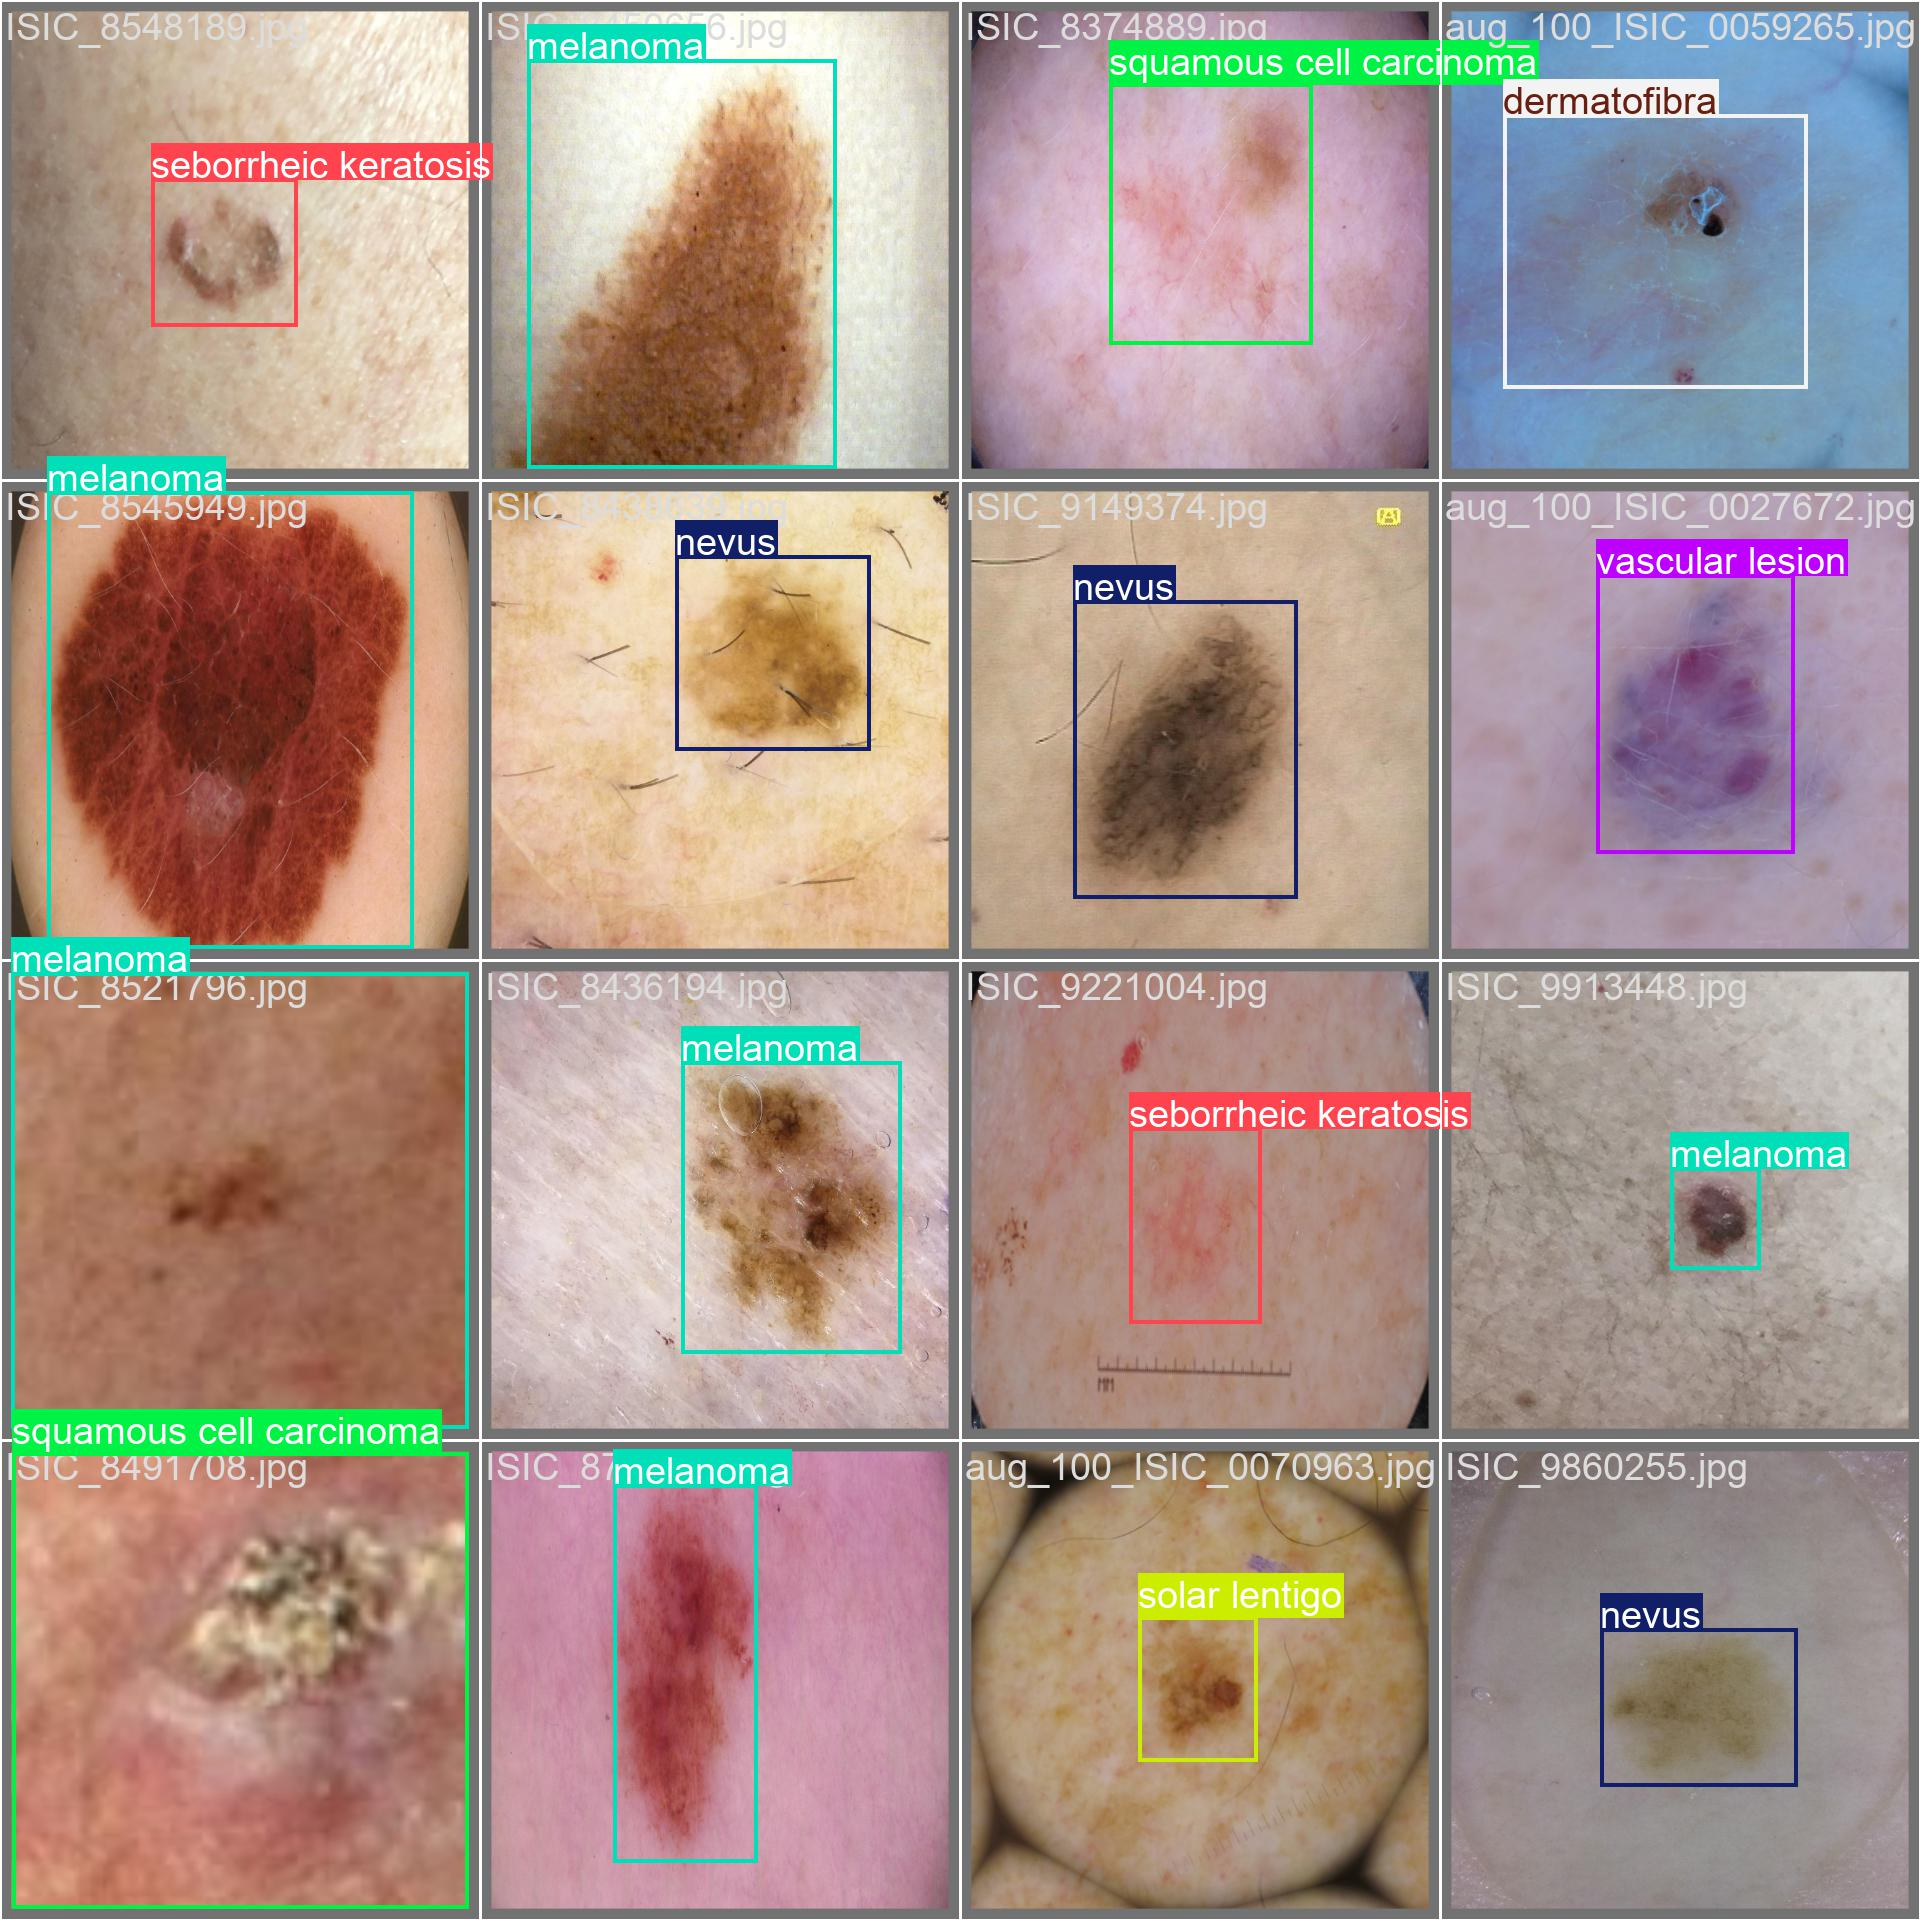


Prediction



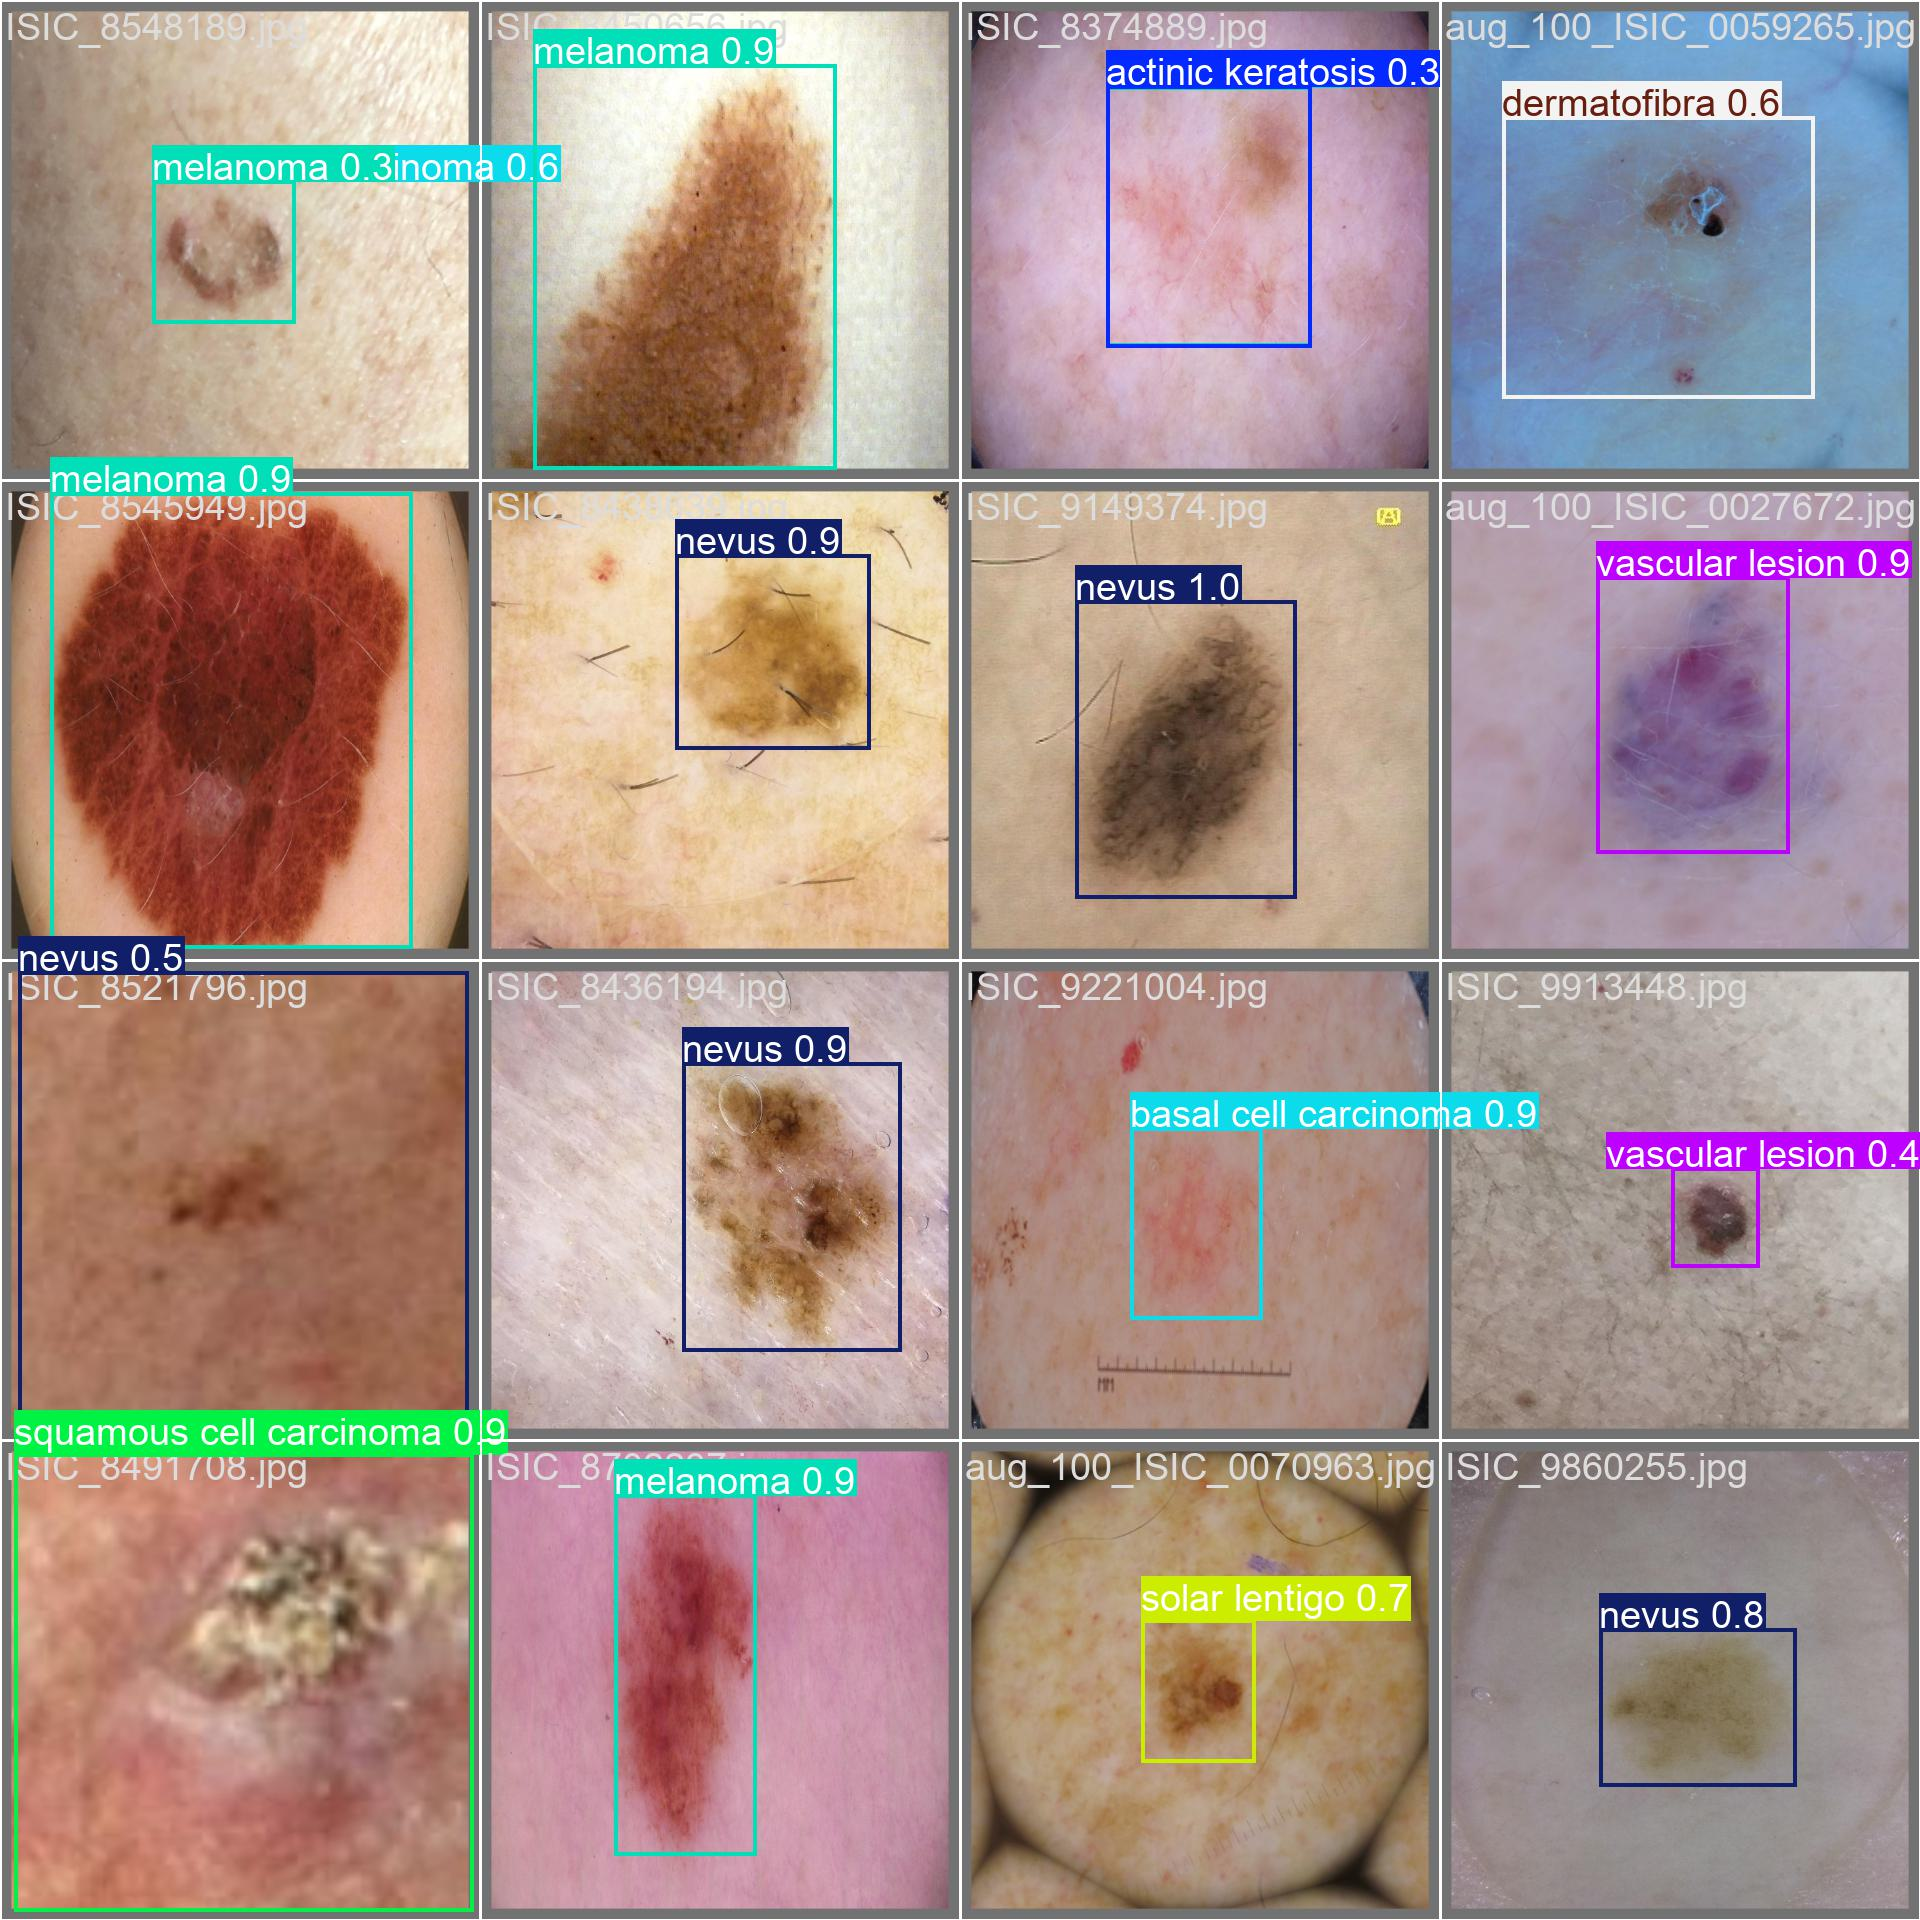

In [27]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=500))

Ground Truth


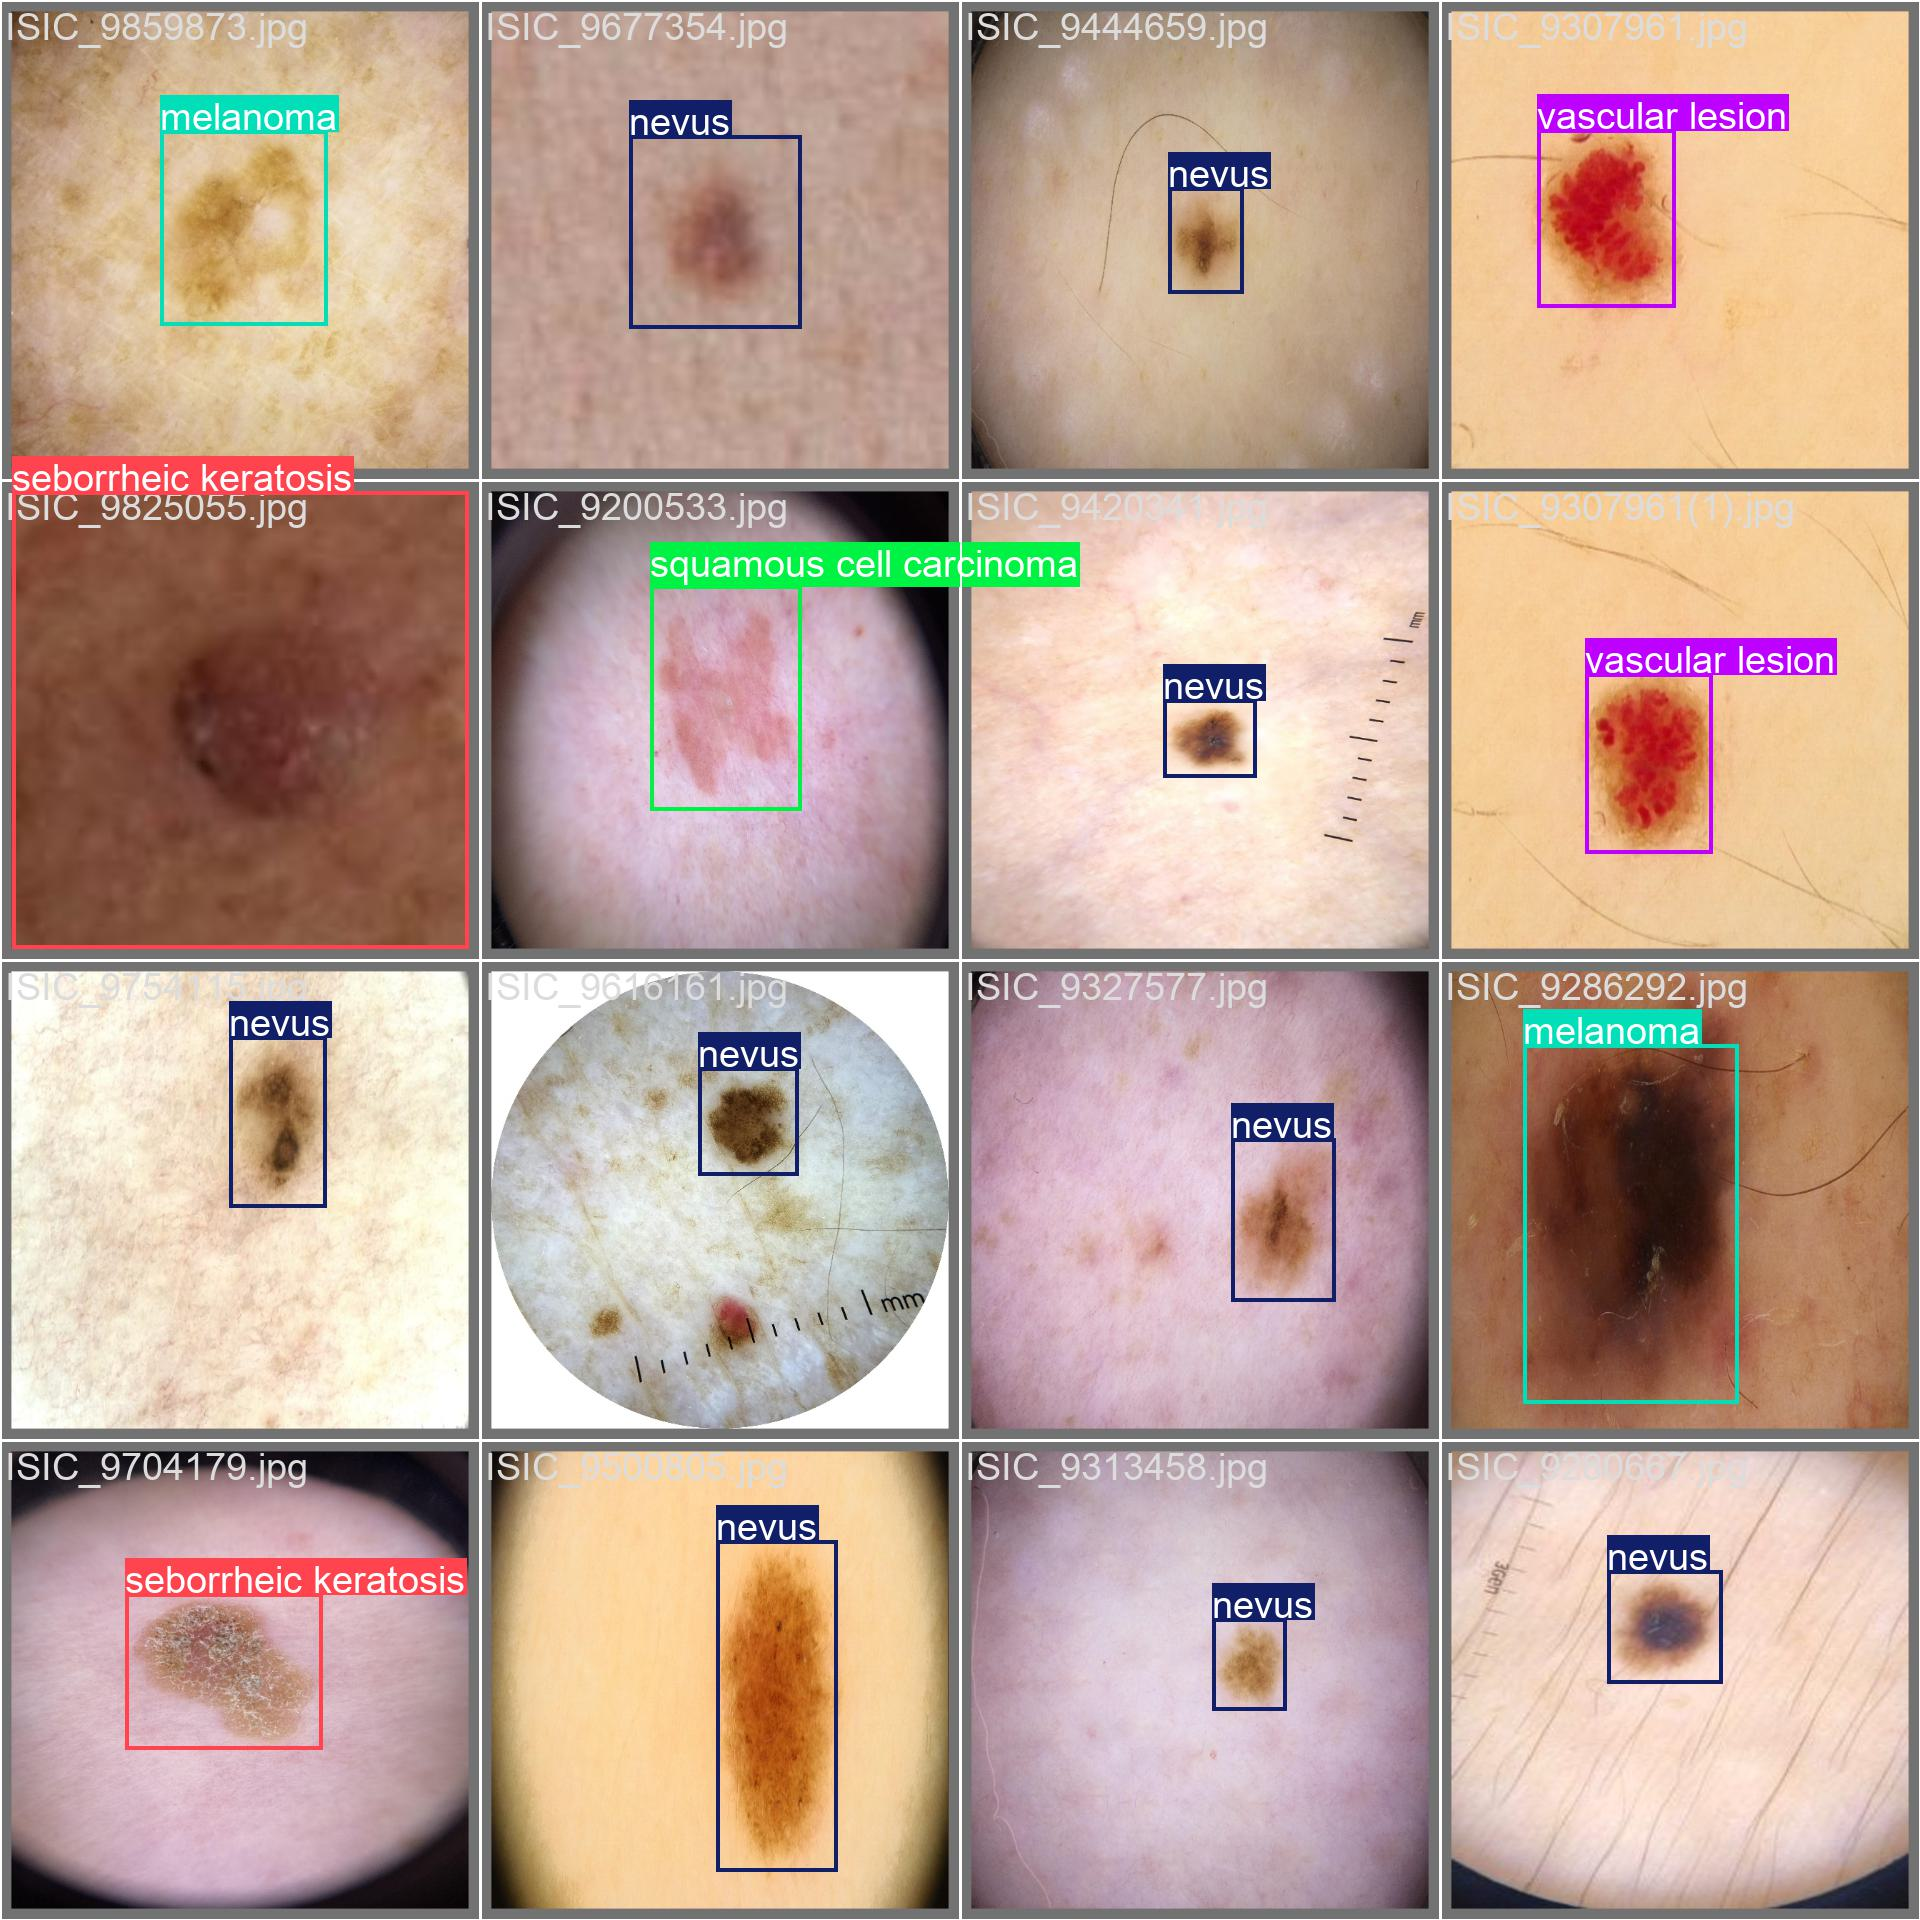


Prediction



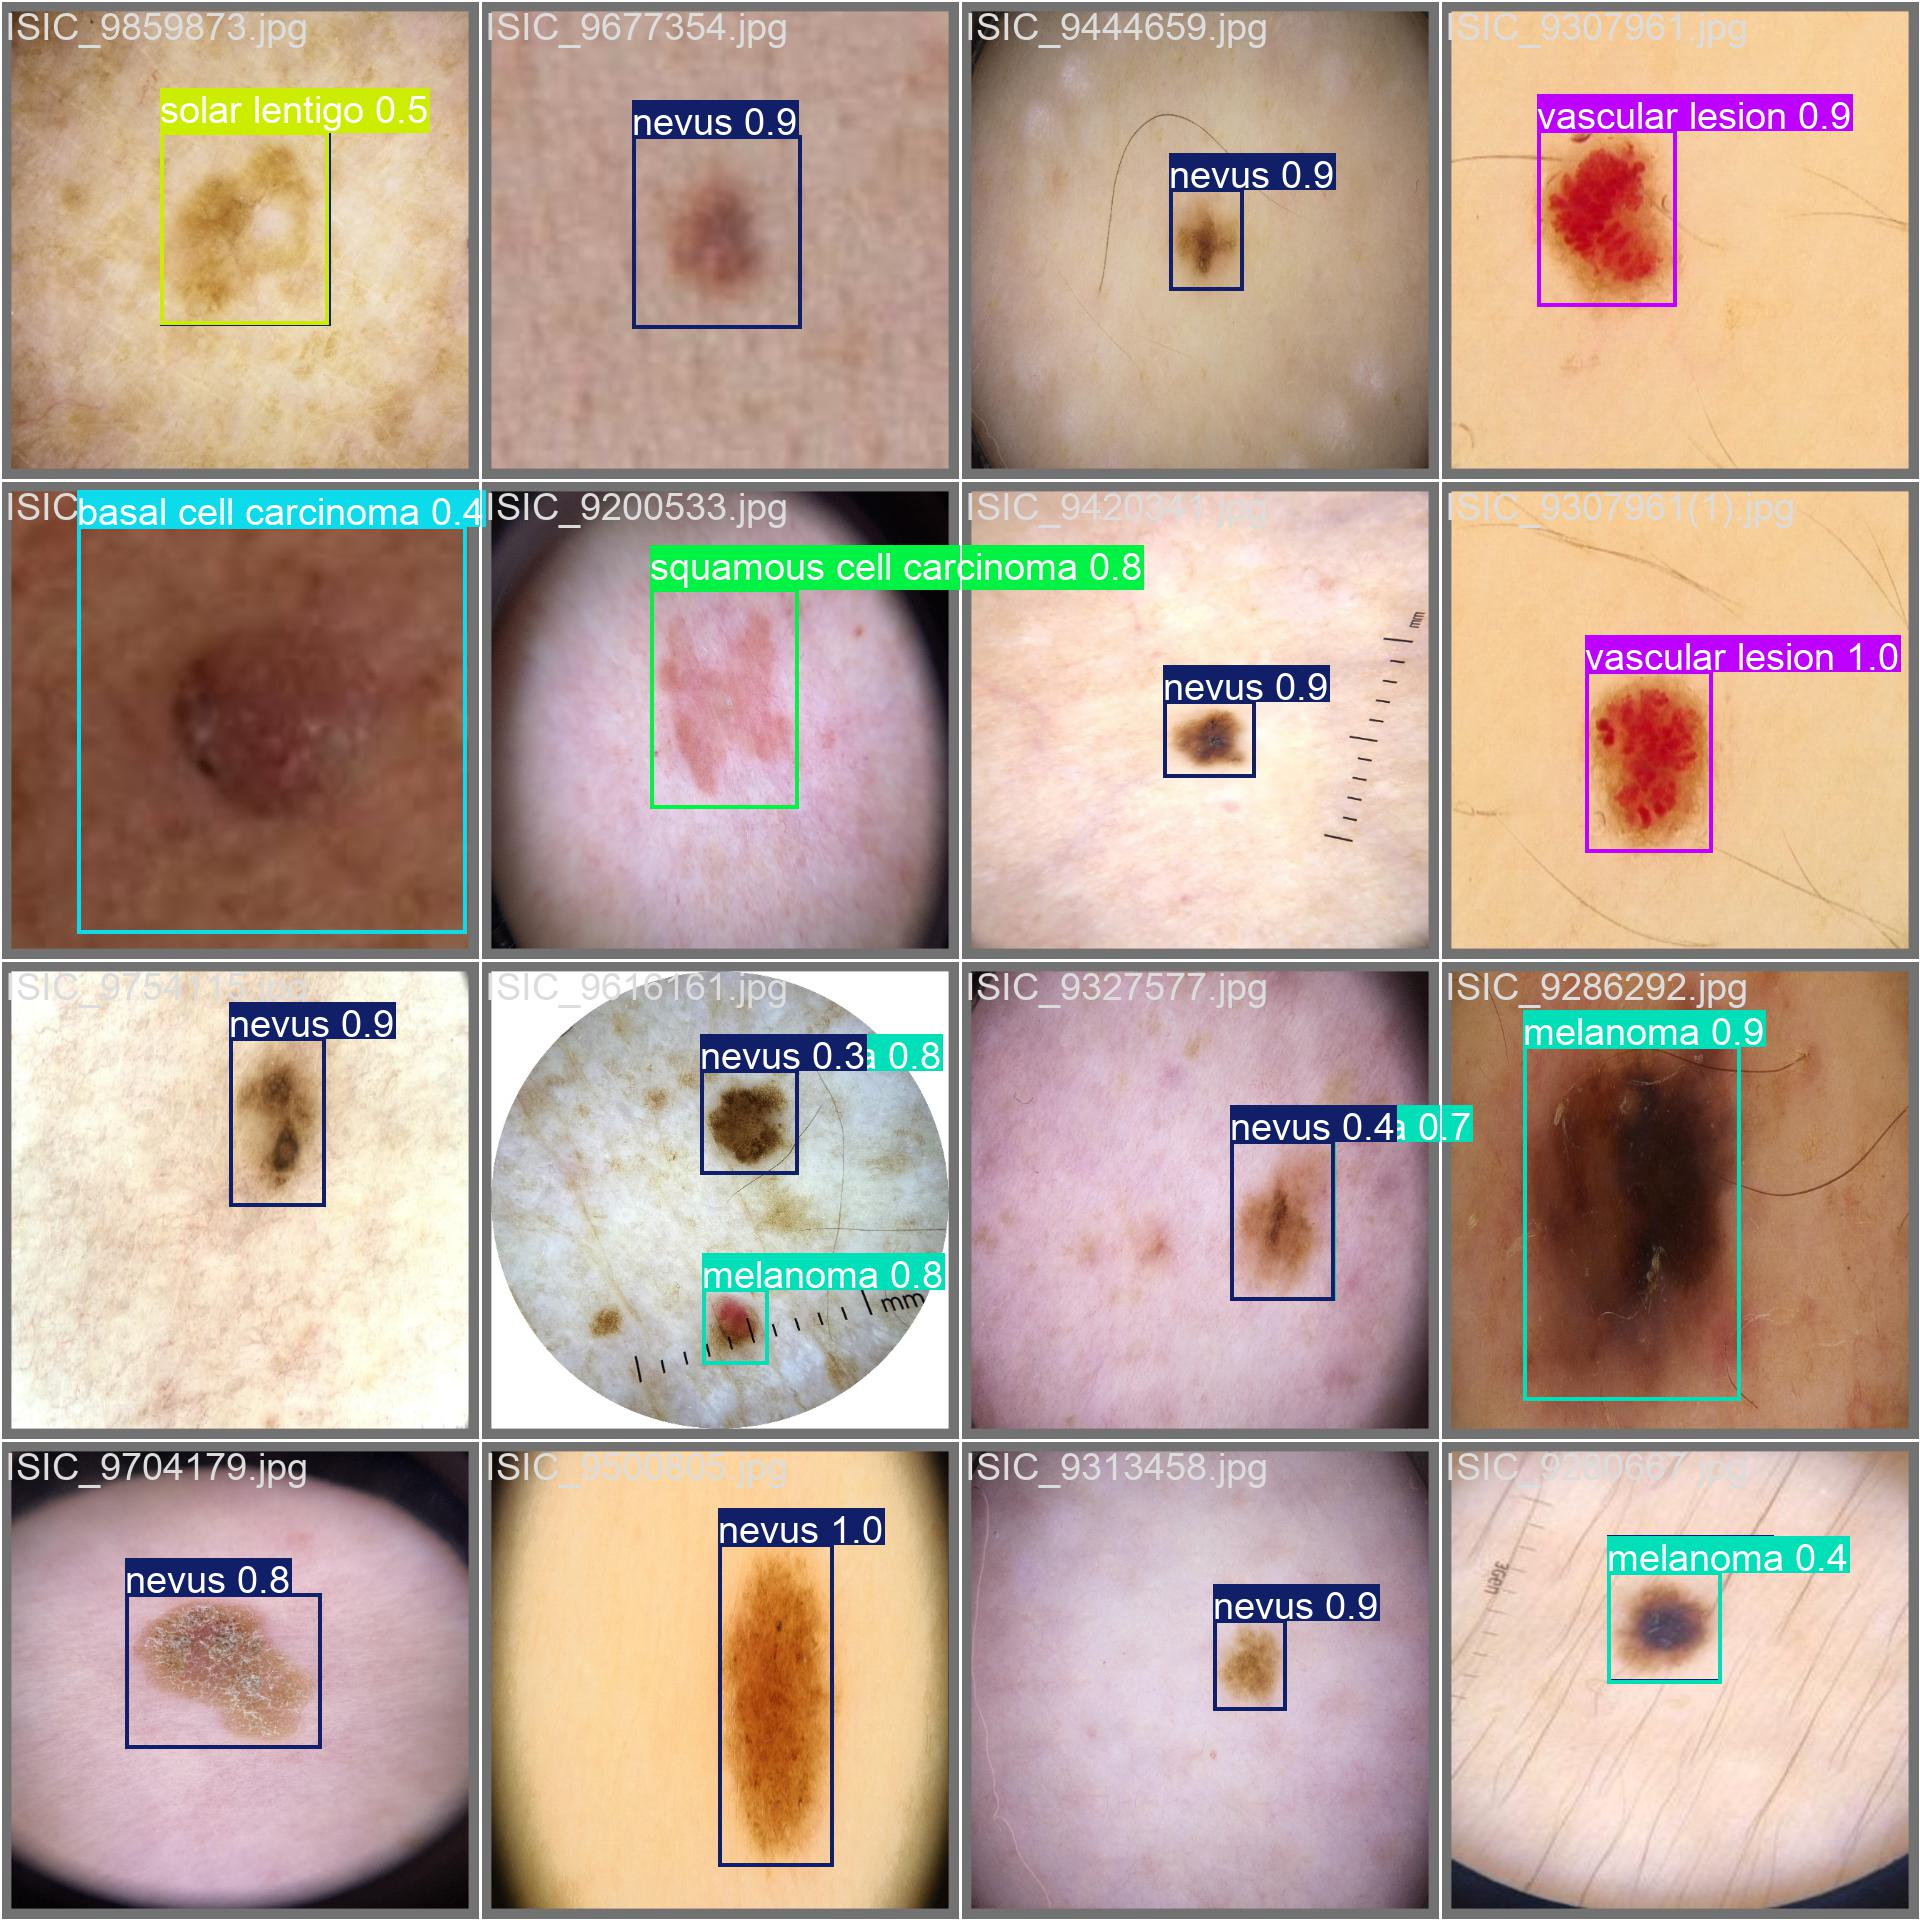

In [39]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val2/val_batch2_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val2/val_batch2_pred.jpg', width=500))

## Testing

ubah dulu data.yaml-nya jadi "val:../test"

In [35]:
%cd {HOME}
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt conf=0.25 data=data.yaml save=True

/athaya
Ultralytics 8.3.19 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 23995MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /athaya/datasets/test/labels... 310 images, 0 backgrounds, 0 corru
val: New cache created: /athaya/datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        310        310      0.821      0.807       0.85      0.783
     actinic keratosis         41         41      0.781      0.707      0.792      0.673
  basal cell carcinoma         39         39      0.744      0.669      0.782      0.755
          dermatofibra         13         13      0.833      0.769      0.858      0.743
              melanoma         36         36      0.893      0.889      0.899      0.865
                 nevus         47         47      0.854      0.809      0.894      0.868
pigmented benign keratosis         35         35      0.888    

ini baru buat nyimpen hasil inference

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=datasets/test/images save=True

/athaya
Ultralytics 8.3.19 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 23995MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs

image 1/310 /athaya/datasets/test/images/ISIC_0011407.jpg: 640x640 1 solar lentigo, 8.5ms
image 2/310 /athaya/datasets/test/images/ISIC_0011456.jpg: 640x640 1 squamous cell carcinoma, 10.9ms
image 3/310 /athaya/datasets/test/images/ISIC_0011865.jpg: 640x640 1 seborrheic keratosis, 7.1ms
image 4/310 /athaya/datasets/test/images/ISIC_0012134.jpg: 640x640 1 seborrheic keratosis, 1 squamous cell carcinoma, 7.0ms
image 5/310 /athaya/datasets/test/images/ISIC_0012184.jpg: 640x640 1 actinic keratosis, 7.0ms
image 6/310 /athaya/datasets/test/images/ISIC_0012340.jpg: 640x640 1 basal cell carcinoma, 7.1ms
image 7/310 /athaya/datasets/test/images/ISIC_0012347.jpg: 640x640 1 basal cell carcinoma, 7.0ms
image 8/310 /athaya/datasets/test/images/ISIC_0012537.jpg: 640x640 1 actinic keratosis, 7.0ms
image 9/310 /athaya/dat

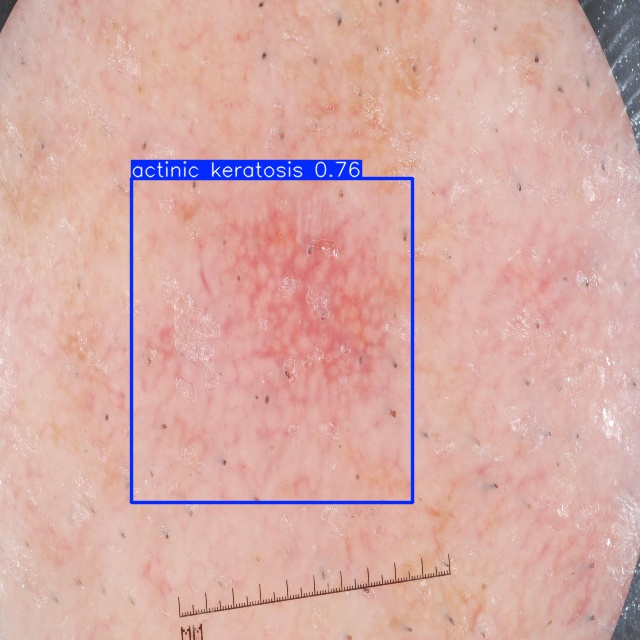

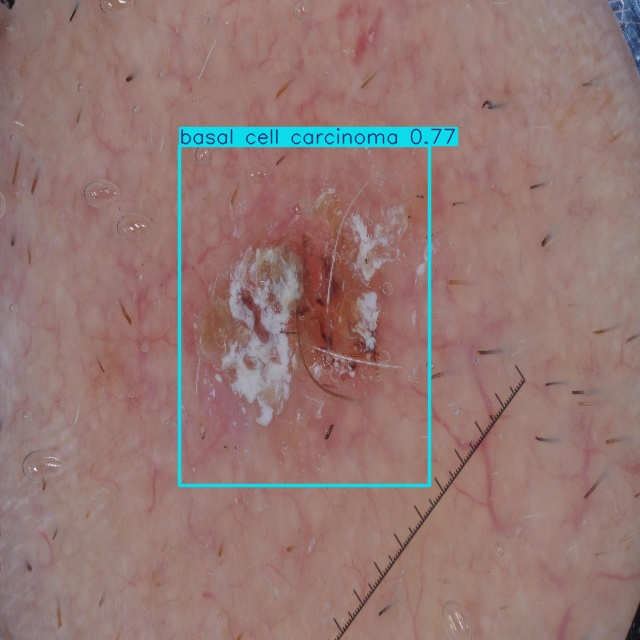

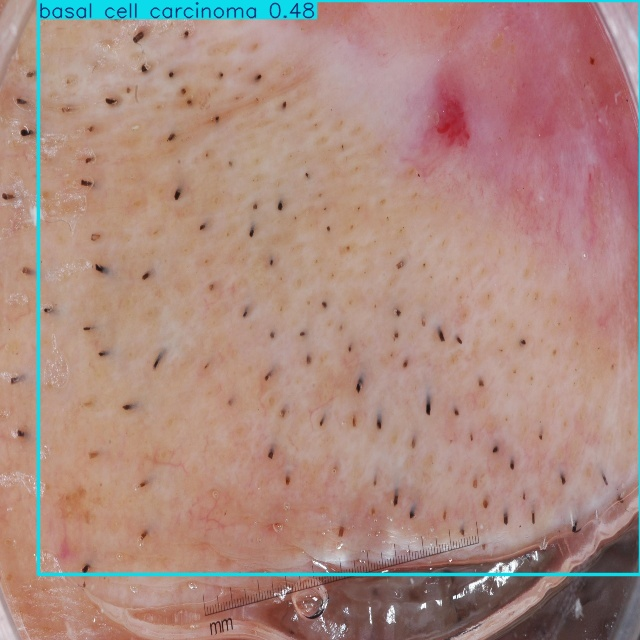

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[4:7]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [34]:
"""menghitung jumlah gambar setiap kelas dari folder datasets"""

import os
from collections import defaultdict

# Fungsi untuk menghitung jumlah gambar per kelas berdasarkan file label
def count_images_per_class(label_dir):
    class_count = defaultdict(int)

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, 'r') as f:
                lines = f.readlines()
                if lines:
                    class_id = int(lines[0].split()[0])  # Ambil digit pertama (class_id)
                    class_count[class_id] += 1

    return class_count

# Fungsi untuk menghitung total per subset (train, valid, test)
def count_all_images(dataset_dir):
    subsets = ['train', 'valid', 'test']
    total_count = {}

    for subset in subsets:
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        count_per_class = count_images_per_class(label_dir)
        total_count[subset] = count_per_class

    return total_count

# Jalankan fungsi
dataset_dir = 'datasets'  # Ganti dengan path ke dataset-mu
class_counts = count_all_images(dataset_dir)

# Tampilkan hasil
for subset, counts in class_counts.items():
    print(f"\nJumlah gambar per kelas di folder {subset}:")
    for class_id, count in counts.items():
        print(f"Class {class_id}: {count} images")



Jumlah gambar per kelas di folder train:
Class 1: 3462 images
Class 5: 3500 images
Class 3: 3495 images
Class 0: 3467 images
Class 7: 3461 images
Class 4: 3490 images
Class 6: 3493 images
Class 8: 3476 images
Class 9: 3499 images
Class 2: 3499 images

Jumlah gambar per kelas di folder valid:
Class 9: 198 images
Class 0: 162 images
Class 4: 185 images
Class 7: 165 images
Class 5: 177 images
Class 6: 159 images
Class 1: 171 images
Class 8: 158 images
Class 2: 160 images
Class 3: 149 images

Jumlah gambar per kelas di folder test:
Class 5: 35 images
Class 1: 39 images
Class 8: 40 images
Class 0: 41 images
Class 4: 47 images
Class 6: 36 images
Class 3: 36 images
Class 7: 12 images
Class 2: 13 images
Class 9: 11 images


In [42]:
"""untuk zip suatu folder"""


import shutil
import os

# Set the folder path you want to zip
folder_to_zip = 'runs/detect'  # replace 'YourFolderName' with the folder name
output_filename = 'detect28.zip'

# Verify the folder exists and has content
if os.path.exists(folder_to_zip) and os.listdir(folder_to_zip):
    # Create a zip file of the folder
    shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

    # Verify if the zip file was created and has content
    if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
        print(f"'{output_filename}' created successfully!")
    else:
        print("Zip file is empty or failed to create.")
else:
    print("Folder does not exist or is empty.")

# Provide a link to download the zip file
from IPython.display import FileLink
FileLink(output_filename)


'detect28.zip' created successfully!


/athaya/detect28.zip